In [21]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [22]:
L = 1.0
alpha = 1.22 * 10**(-3)

nx = 51
dx = L / (nx - 1)



x = numpy.linspace(0.0, L, num=nx)

In [23]:
u0 = numpy.zeros(nx)
u0[0] = 100.0
u0[-1] = 0.0

In [24]:
def ftcs (u0, nt, dt, dx, alpha):
    u = u0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        u[0] = u0[0]
        u[-1] = u0[-1]
        u[1:-1] = (u[1:-1] + sigma * (u[:-2] - 2 * u[1:-1] + u[2:]))

    return u

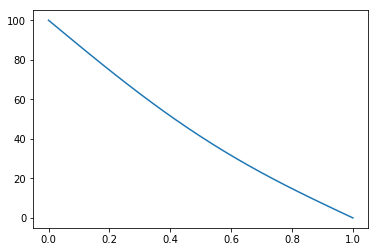

In [36]:
nt = 1000
sigma = 0.5
dt = sigma * (dx**2 / alpha)

T = ftcs (u0, nt, dt, dx, alpha)
pyplot.plot(x, T);

In [37]:
def ftcs_neumann (u0, nt, dt, dx, alpha, q):
    u = u0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        # update interior points
        u[1:-1] = (u[1:-1] + sigma * (u[:-2] - 2 * u[1:-1] + u[2:]))
        # update left value
        u[0] = u0[0]
        # update right value
        u[-1] = u[-2] + q * dx
    return u

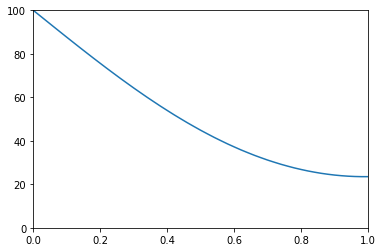

In [38]:
T_neumann = ftcs_neumann (u0, nt, dt, dx, alpha, q=0)
pyplot.plot(x, T_neumann)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);